In [15]:
import pymongo
import pprint
import re
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)

In [3]:
db = client['movies']
collection = db['tmdb_5000_movies']
doc_iterator=collection.find()

In [4]:
doc_iterator.count()

C:\Users\jackm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


4803

In [5]:
for doc in collection.find().limit(2):
    pprint.pprint(doc)

{'_id': ObjectId('5d29e82c2f5bfacb0ea74ce5'),
 'budget': 237000000,
 'genres': '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, '
           '{"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science '
           'Fiction"}]',
 'homepage': 'http://www.avatarmovie.com/',
 'id': 19995,
 'keywords': '[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": '
             '"future"}, {"id": 3386, "name": "space war"}, {"id": 3388, '
             '"name": "space colony"}, {"id": 3679, "name": "society"}, {"id": '
             '3801, "name": "space travel"}, {"id": 9685, "name": '
             '"futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, '
             '"name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, '
             '"name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": '
             '10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": '
             '13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, '
     

In [13]:
db = client.movies
collection = db.tmdb_5000_movies
df = pd.DataFrame(list(collection.find()))
df.head(5)

,_id,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,5d29e82c2f5bfacb0ea74ce5,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,5d29e82c2f5bfacb0ea74ce6,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,5d29e82c2f5bfacb0ea74ce7,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
3,5d29e82c2f5bfacb0ea74ce8,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
4,5d29e82c2f5bfacb0ea74ce9,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0, 0.5, 'revenue')

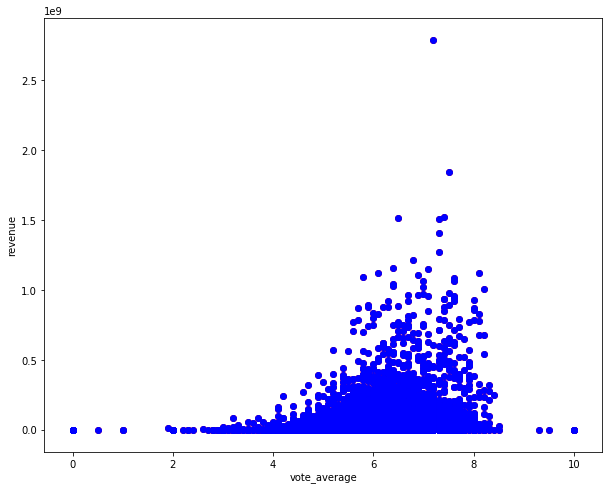

In [20]:
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=df.vote_average,y = df.revenue,c="red")
plt.scatter(x=df.vote_average,y = df.revenue,c="blue")
plt.xlabel("vote_average")
plt.ylabel("revenue")

In [21]:
x = np.array(df.vote_average)
y = np.array(df.revenue)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.show()

NameError: name 'np' is not defined